#Pre req

##Install Pre req from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
cd /root/.kaggle

/root/.kaggle


In [ ]:
!pwd
!ls

/root/.kaggle


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
cd /content

/content


In [ ]:
!kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                           6MB  2021-02-09 07:27:13            511  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020                    16KB  2021-01-30 14:20:45            430  
aagghh/crypto-telegram-groups                             Crypto telegram groups                              297MB  2021-02-02 09:58:25             91  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                               1MB  2021-01-29 13:53:50            100  
timoboz/superbowl-history-1967-2020                       Superbowl History 

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 61.6MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 64.0MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.0MB/s]


##Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

from collections import Counter

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from sklearn.ensemble import RandomForestClassifier

#Setting for notebook
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#Loading the data

In [ ]:
with open("train.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
Tweets = pd.read_csv("/content/train.csv", encoding="utf-8")

#Preprocessing

##Exploring the data

In [ ]:
Tweets.head(10)

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
5   8     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...   
6  10     NaN      NaN  #flood #disaster Heavy rain causes flash flood...   
7  13     NaN      NaN  I'm on top of the hill and I can see a fire in...   
8  14     NaN      NaN  There's an emergency evacuation happening now ...   
9  15     NaN      NaN  I'm afraid that the tornado is coming to our a...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [ ]:
Tweets.describe(include="all")

id     keyword location  \
count    7613.000000        7552     5080   
unique           NaN         221     3341   
top              NaN  fatalities      USA   
freq             NaN          45      104   
mean     5441.934848         NaN      NaN   
std      3137.116090         NaN      NaN   
min         1.000000         NaN      NaN   
25%      2734.000000         NaN      NaN   
50%      5408.000000         NaN      NaN   
75%      8146.000000         NaN      NaN   
max     10873.000000         NaN      NaN   

                                                     text      target  
count                                                7613  7613.00000  
unique                                               7503         NaN  
top     11-Year-Old Boy Charged With Manslaughter of T...         NaN  
freq                                                   10         NaN  
mean                                                  NaN     0.42966  
std                                                   NaN     0.49506  
min                                                   NaN     0.00000  
25%                                                   NaN     0.00000  
50%                                                   NaN     0.00000  
75%                                                   NaN     1.00000  
max                                                   NaN     1.00000

In [ ]:
Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


###Exploring the keyword and location cols

In [ ]:
Keyworddict_unique = Tweets["keyword"].unique()
print(len(Keyworddict_unique))
print(Keyworddict_unique)

222
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'd

In [ ]:
Keyword_col = Tweets["keyword"].dropna(axis=0)
Keyword_col_split = Keyword_col.str.split(expand=True, pat="%20")
Keyword_col_split.head(100)

0     1     2
31       ablaze  None  None
32       ablaze  None  None
33       ablaze  None  None
34       ablaze  None  None
35       ablaze  None  None
36       ablaze  None  None
37       ablaze  None  None
38       ablaze  None  None
39       ablaze  None  None
40       ablaze  None  None
41       ablaze  None  None
42       ablaze  None  None
43       ablaze  None  None
44       ablaze  None  None
45       ablaze  None  None
46       ablaze  None  None
47       ablaze  None  None
48       ablaze  None  None
49       ablaze  None  None
50       ablaze  None  None
51       ablaze  None  None
52       ablaze  None  None
53       ablaze  None  None
54       ablaze  None  None
55       ablaze  None  None
56       ablaze  None  None
57       ablaze  None  None
58       ablaze  None  None
59       ablaze  None  None
60       ablaze  None  None
61       ablaze  None  None
62       ablaze  None  None
63       ablaze  None  None
64       ablaze  None  None
65       ablaze  None  None
66       ablaze  None  None
67     accident  None  None
68     accident  None  None
69     accident  None  None
70     accident  None  None
71     accident  None  None
72     accident  None  None
73     accident  None  None
74     accident  None  None
75     accident  None  None
76     accident  None  None
77     accident  None  None
78     accident  None  None
79     accident  None  None
80     accident  None  None
81     accident  None  None
82     accident  None  None
83     accident  None  None
84     accident  None  None
85     accident  None  None
86     accident  None  None
87     accident  None  None
88     accident  None  None
89     accident  None  None
90     accident  None  None
91     accident  None  None
92     accident  None  None
93     accident  None  None
94     accident  None  None
95     accident  None  None
96     accident  None  None
97     accident  None  None
98     accident  None  None
99     accident  None  None
100    accident  None  None
101    accident  None  None
102  aftershock  None  None
103  aftershock  None  None
104  aftershock  None  None
105  aftershock  None  None
106  aftershock  None  None
107  aftershock  None  None
108  aftershock  None  None
109  aftershock  None  None
110  aftershock  None  None
111  aftershock  None  None
112  aftershock  None  None
113  aftershock  None  None
114  aftershock  None  None
115  aftershock  None  None
116  aftershock  None  None
117  aftershock  None  None
118  aftershock  None  None
119  aftershock  None  None
120  aftershock  None  None
121  aftershock  None  None
122  aftershock  None  None
123  aftershock  None  None
124  aftershock  None  None
125  aftershock  None  None
126  aftershock  None  None
127  aftershock  None  None
128  aftershock  None  None
129  aftershock  None  None
130  aftershock  None  None

In [ ]:
Keyword_col_split[0].unique()

array(['ablaze', 'accident', 'aftershock', 'airplane', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blew', 'blight', 'blizzard', 'blood', 'bloody', 'blown', 'body',
       'bomb', 'bombed', 'bombing', 'bridge', 'buildings', 'burned',
       'burning', 'bush', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical', 'cliff', 'collapse', 'collapsed',
       'collide', 'collided', 'collision', 'crash', 'crashed', 'crush',
       'crushed', 'curfew', 'cyclone', 'damage', 'danger', 'dead',
       'death', 'deaths', 'debris', 'deluge', 'deluged', 'demolish',
       'demolished', 'demolition', 'derail', 'derailed', 'derailment',
       'desolate', 'desolation', 'destroy', 'destroyed', 'destruction',
       'detonate', 'detonation', 'devastated', 'devastation', 'disaster',
       'displa

In [ ]:
Keyword = Keyword_col_split[0] + " " +  Keyword_col_split[1] + " " +   Keyword_col_split[2]
Test = Keyword.dropna(axis=0)
Keyword.head(100)

31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN
91     NaN
92     NaN
93     NaN
94     NaN
95     NaN
96     NaN
97     NaN
98     NaN
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
110    NaN
111    NaN
112    NaN
113    NaN
114    NaN
115    NaN
116    NaN
117    NaN
118    NaN
119    NaN
120    NaN
121    NaN

In [ ]:
Keyword_col = Tweets["keyword"]
Keyword_col1 = pd.Series(Keyword_col).str.replace('%20', ' ', regex=True)
Keyword_col1.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desol

##Test train split

In [ ]:
Tweets, Tweets_test = train_test_split(Tweets, test_size=0.2, random_state=42, shuffle=True)
print(type(Tweets), type(Tweets_test))
print(Tweets.shape, Tweets_test.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(6090, 5) (1523, 5)


In [ ]:
Tweets_test.head(10)

id      keyword               location  \
2644  3796  destruction                    NaN   
2227  3185       deluge                    NaN   
5448  7769       police                     UK   
132    191   aftershock                    NaN   
6845  9810       trauma  Montgomery County, MD   
5559  7934    rainstorm                    NaN   
1765  2538    collision                    NaN   
1817  2611      crashed                    NaN   
6810  9756      tragedy        Los Angeles, CA   
4398  6254    hijacking          Athens,Greece   

                                                   text  target  
2644  So you have a new weapon that can cause un-ima...       1  
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0  
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1  
132   Aftershock back to school kick off was great. ...       0  
6845  in response to trauma Children of Addicts deve...       0  
5559  @Calum5SOS you look like you got caught in a r...       0  
1765  my favorite lady came to our volunteer meeting...       1  
1817  @brianroemmele UX fail of EMV - people want to...       1  
6810  Can't find my ariana grande shirt  this is a f...       0  
4398  The Murderous Story Of AmericaÛªs First Hijac...       1

In [ ]:
Tweets.reset_index(drop=True, inplace=True)
Tweets_test.reset_index(drop=True, inplace=True)

##Dropping Nul cols

In [ ]:
Tweets.isnull().sum()

id             0
keyword       48
location    2020
text           0
target         0
dtype: int64

In [ ]:
Tweets.drop(labels=["keyword", "location"], axis=1, inplace=True)
Tweets.head()

id                                               text  target
0  7128  Courageous and honest analysis of need to use ...       1
1  4688  @ZachZaidman @670TheScore wld b a shame if tha...       0
2  6984  Tell @BarackObama to rescind medals of 'honor'...       1
3  4103  Worried about how the CA drought might affect ...       1
4  6706  @YoungHeroesID Lava Blast &amp; Power Red #Pan...       0

## Analyzing the data

In [ ]:
DisaterTweetCount = len(Tweets[Tweets["target"] == 1])
DisaterTweetPercentage = (DisaterTweetCount / Tweets.shape[0]) * 100
NormalTweetPercentage = 100 - DisaterTweetPercentage
print("Percentage of disaster tweets: ", DisaterTweetPercentage)
print("Percentage of normal tweets: ", NormalTweetPercentage)

Percentage of disaster tweets:  43.05418719211823
Percentage of normal tweets:  56.94581280788177


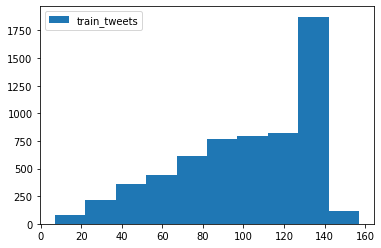

In [ ]:
length_train = Tweets['text'].str.len() 
plt.hist(length_train, label="train_tweets") 
plt.legend() 
plt.show()

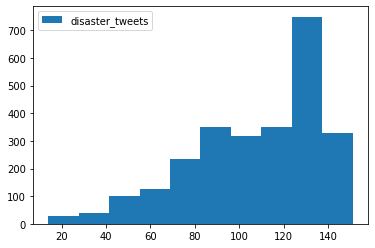

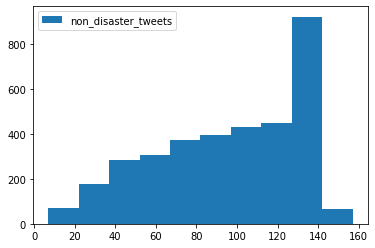

In [ ]:
length_disaster_tweets = Tweets[Tweets["target"] == 1]['text'].str.len() 
plt.hist(length_disaster_tweets, label="disaster_tweets")

plt.legend() 
plt.show()

length_non_disaster_tweets = Tweets[Tweets["target"] != 1]['text'].str.len() 
plt.hist(length_non_disaster_tweets, label="non_disaster_tweets")
plt.legend() 
plt.show()

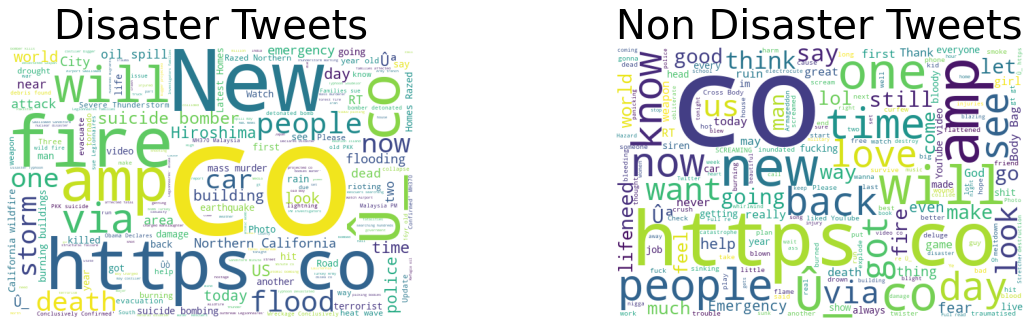

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 5])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Tweets[Tweets["target"] == 1]['text']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Tweets[Tweets["target"] != 1]['text']))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

##Cleaning the data

In [ ]:
def RemoveUncleanText(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

Tweets['text'] = Tweets['text'].apply(lambda x: RemoveUncleanText(x))
Tweets.head()

id                                               text  target
0  7128  courageous and honest analysis of need to use ...       1
1  4688  zachzaidman  wld b a shame if that golf cart b...       0
2  6984  tell barackobama to rescind medals of honor gi...       1
3  4103  worried about how the ca drought might affect ...       1
4  6706  youngheroesid lava blast amp power red panther...       0

In [ ]:
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
Tweets['text'] = Tweets['text'].apply(lambda x:tokenizer.tokenize(x))
Tweets.head()

id                                               text  target
0  7128  [courageous, and, honest, analysis, of, need, ...       1
1  4688  [zachzaidman, wld, b, a, shame, if, that, golf...       0
2  6984  [tell, barackobama, to, rescind, medals, of, h...       1
3  4103  [worried, about, how, the, ca, drought, might,...       1
4  6706  [youngheroesid, lava, blast, amp, power, red, ...       0

In [ ]:
nltk.download('stopwords')
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words 
Tweets['text'] = Tweets['text'].apply(lambda x : remove_stopwords(x))
Tweets.head()

id                                               text  target
0  7128  [courageous, honest, analysis, need, use, atom...       1
1  4688  [zachzaidman, wld, b, shame, golf, cart, becam...       0
2  6984  [tell, barackobama, rescind, medals, honor, gi...       1
3  4103  [worried, ca, drought, might, affect, extreme,...       1
4  6706  [youngheroesid, lava, blast, amp, power, red, ...       0

In [ ]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

# Tweets['text'] = Tweets['text'].apply(lambda x : combine_text(x))
# Tweets.head()

In [ ]:
Tweets_test.drop(labels=["keyword", "location"], axis=1, inplace=True)
Tweets_test['text'] = Tweets_test['text'].apply(lambda x: RemoveUncleanText(x))
Tweets_test['text'] = Tweets_test['text'].apply(lambda x:tokenizer.tokenize(x))
Tweets_test['text'] = Tweets_test['text'].apply(lambda x : remove_stopwords(x))

#Training the model

In [ ]:
word_corpus = {}
for i in Tweets['text']:
  for j in i:
  
    if j in word_corpus:
      word_corpus[j] += 1
    else:
      word_corpus[j] = 1
print(len(word_corpus))
word_corpus_df = pd.DataFrame(word_corpus.items(), columns=['Word', 'Freq'])

word_corpus_df.sort_values('Freq', axis=0, inplace=True, ascending=False, ignore_index=True)
word_corpus_df.head(10)

14282


Word  Freq
0       û   341
1    like   273
2     amp   238
3      im   235
4    fire   194
5     get   184
6     via   176
7     new   172
8  people   167
9    news   156

##Bag of words

In [ ]:
def text_vecorize(text):
    text_vec = []
    for j in word_corpus_df['Word']:
      if j in text:
        text_vec.append(1)
      else:
        text_vec.append(0)
    # print(text_vec)
    return pd.Series(text_vec, dtype=int)

Text_vec_df = pd.DataFrame(Tweets['text'].apply(lambda x : text_vecorize(x)))#, columns=word_corpus_df['Word'])
Text_vec_df.fillna(value=0, inplace=True)
Text_vec_df.head(10)

0      1      2      3      4      5      6      7      8      9      \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      1      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      1      0      0      0      0      0      0      0   
5      0      0      0      0      0      0      0      0      0      0   
6      0      0      0      0      0      0      0      0      0      0   
7      0      0      0      0      0      0      0      0      0      0   
8      0      0      0      0      0      0      0      0      0      0   
9      0      0      0      0      0      0      0      0      0      0   

   10     11     12     13     14     15     16     17     18     19     \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      1      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   
5      0      0      0      0      0      0      0      0      0      0   
6      0      0      0      0      1      0      0      0      0      0   
7      0      0      0      0      0      0      0      0      0      0   
8      0      0      0      0      0      0      0      0      0      0   
9      0      0      0      0      0      0      0      0      0      0   

   20     21     22     23     24     25     26     27     28     29     \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   
5      0      0      0      0      0      0      0      0      0      0   
6      0      0      0      0      0      0      0      0      0      0   
7      0      0      0      0      0      0      0      0      0      0   
8      0      0      0      0      0      0      0      1      0      0   
9      0      0      0      0      0      0      0      0      0      0   

   30     31     32     33     34     35     36     37     38     39     \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   
5      0      0      0      0      0      0      0      0      0      0   
6      0      0      0      0      0      0      0      0      0      0   
7      0      0      0      0      0      0      0      0      0      0   
8      0      0      0      0      0      0      0      0      0      0   
9      0      0      0      0      0      0      0      0      0      0   

   40     41     42     43     44     45     46     47     48     49     \
0      0      0      0      0      0      0      0      1      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      1      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   
5      0      0      0      0      0      0      0      0      0      0   
6      0      0      0      0      0      0      0      0      0      0   
7      0      0      0      0      0      0      0      0      0      0   
8      0      0      0  

In [ ]:
Tweets_test_vec_df = pd.DataFrame(Tweets_test['text'].apply(lambda x : text_vecorize(x)))#, columns=word_corpus_df['Word'])
Tweets_test_vec_df.fillna(value=0, inplace=True)

In [ ]:
X_train, y_train, X_test, y_test = (Text_vec_df, Tweets['target'], Tweets_test_vec_df, Tweets_test['target'],)#train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

Model = LogisticRegression()

Model.fit(X_train, y_train)
y_pred_train = Model.predict(X_train)
y_pred_test = Model.predict(X_test)

print(precision_score(y_train, y_pred_train, average='micro'), recall_score(y_train, y_pred_train, average='micro'))
print(precision_score(y_test, y_pred_test, average='micro'), recall_score(y_test, y_pred_test, average='micro'))

0.960919540229885 0.960919540229885
0.7931713722915299 0.7931713722915299


#Submitting the files

In [ ]:
Tweets_final_test = pd.read_csv("test.csv", low_memory=False)

In [ ]:
Tweets_final_test.drop(labels=["keyword", "location"], axis=1, inplace=True)
Tweets_final_test['text'] = Tweets_final_test['text'].apply(lambda x: RemoveUncleanText(x))
Tweets_final_test['text'] = Tweets_final_test['text'].apply(lambda x:tokenizer.tokenize(x))
Tweets_final_test['text'] = Tweets_final_test['text'].apply(lambda x : remove_stopwords(x))

Tweets_final_test_vec_df = pd.DataFrame(Tweets_final_test['text'].apply(lambda x : text_vecorize(x)))#, columns=word_corpus_df['Word'])
Tweets_final_test_vec_df.fillna(value=0, inplace=True)

X_final_test = Tweets_final_test_vec_df

In [ ]:
column_one = Tweets_final_test["id"]
column_two = Model.predict(X_final_test)

thedict = {"id":column_one , 'target': column_two }

y_pred = pd.DataFrame(thedict)
y_pred.to_csv('test_pred.csv', index=False)

In [ ]:
from google.colab import files
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>